### Analyzing the Stroop Effect
(1) What is the independent variable? What is the dependent variable?

Independent variable is the 'Read Time' (Read Time is the time it takes to name the ink colors in equally-sized lists). Dependent variable is the 'Task words condition'. Task words condition has two values: Congruent Words Condition, and Incongruent Words Condition. For each user (observation), 'Task words condition' (independent variable) is changed between congruent words condition and incongruent words condition and 'Read Time' (dependent variable) is measured.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

My goal is to test if congruent words condition has lower read time than incongruent words condition. In this case, I want to assume that the congruent words condition has longer or same read time as incongruent words condition unless the congruent words condition proves to have shorter read time at a Type I error rate of 5%. Below is how I write the null and alternative hypothesis:
$$H_0: u_{diff} \geq 0$$


$$H_1: u_{diff} < 0$$


$u_{diff}$ is the population mean difference between the read time of congruent and incongruent words condition.

I will use paired sample one tailed t-test to distinguish the above proposed hypotheses. The assumptions for paired sample one tailed t-test are:
1. t-tests are most appropriate when dealing with problems with a limited sample size (generally n < 30). The larger the sample size the better. Based on my fundamental knowledge of statistics, at least 20 observations are necessary to evaluate normality properly.
2. The differences in read times should be approximately normally distributed. 
3. Mean of differences in read times is the population parameter of interest.
4. Original population standard deviation for differences in read times is unknown.

Works Cited:
1. http://www.webassign.net/idcollabstat2/Chapter10.pdf
2. http://www.statstutor.ac.uk/resources/uploaded/paired-t-test.pdf

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# Read in the stroopdata.csv data. Store it in df. Look at the top few rows
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
# Report some descriptive statistics
print("Measures of Central Tendency")
print("Mean of congruent read times: {}".format(df['Congruent'].mean()))
print("Mean of incongruent read times: {}".format(df['Incongruent'].mean()))
print("Median of congruent read times: {}".format(df['Congruent'].median()))
print("Median of incongruent read times: {}".format(df['Incongruent'].median()))
print(' ')
print("Measures of Variability")
print("Interquartile Range of congruent read times: {}".format(stats.iqr(df['Congruent'])))
print("Interquartile Range of incongruent read times: {}".format(stats.iqr(df['Incongruent'])))
print("Standard Deviation of congruent read times: {}".format(df['Congruent'].std()))
print("Standard Deviation of incongruent read times: {}".format(df['Incongruent'].std()))

Measures of Central Tendency
Mean of congruent read times: 14.051124999999999
Mean of incongruent read times: 22.015916666666666
Median of congruent read times: 14.3565
Median of incongruent read times: 21.0175
 
Measures of Variability
Interquartile Range of congruent read times: 4.3054999999999986
Interquartile Range of incongruent read times: 5.33475
Standard Deviation of congruent read times: 3.5593579576451955
Standard Deviation of incongruent read times: 4.797057122469138


### Measures of Central Tendency

Mean of congruent read times: 14.051124999999999

Mean of incongruent read times: 22.015916666666666

Median of congruent read times: 14.3565

Median of incongruent read times: 21.0175



### Measures of Variability

Interquartile Range of congruent read times: 4.3054999999999986

Interquartile Range of incongruent read times: 5.33475

Standard Deviation of congruent read times: 3.5593579576451955

Standard Deviation of incongruent read times: 4.797057122469138


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

### Helper Function


#### Plot histogram and do skew analysis


In [3]:
def analyze_skew(df, analyze_var):

    # Source for skew measure: http://www.statisticshowto.com/probability-and-statistics/skewed-distribution/
    skew_val = df[analyze_var].mean() - df[analyze_var].median()
    if skew_val > 0:
        print("The {} read times have a right (positive) skew".format(analyze_var))
    elif skew_val < 0:
        print("The {} read times have a left (negative) skew".format(analyze_var))
    else:
        print("The {} read times have no skew".format(analyze_var))

    # Generate histogram for variable
    plt.hist(df[analyze_var])
    plt.title('Histogram ' + analyze_var)
    plt.xlabel(analyze_var)
    plt.ylabel('Frequency of {}'.format(analyze_var))

The Congruent read times have a left (negative) skew


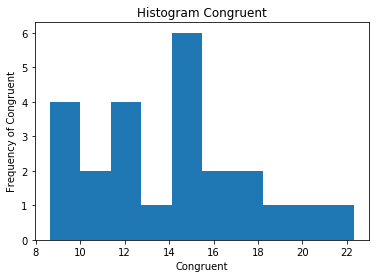

In [4]:
# Plot histogram for Congruent
analyze_skew(df, 'Congruent')

The Incongruent read times have a right (positive) skew


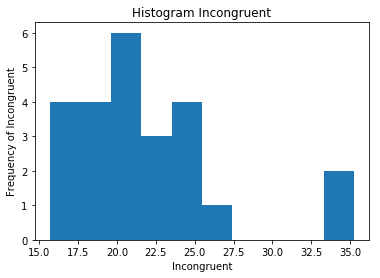

In [5]:
# Plot histogram for Incongruent
analyze_skew(df, 'Incongruent')

Text(0,0.5,'Frequency of Congruent - Incongruent')

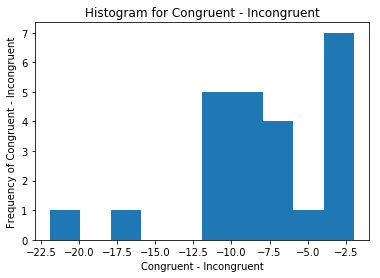

In [6]:
# Plot histogram for Congruent - Incongruent
rt_diffs = df['Congruent'] - df['Incongruent']
plt.hist(rt_diffs)
plt.title('Histogram for Congruent - Incongruent')
plt.xlabel('Congruent - Incongruent')
plt.ylabel('Frequency of {}'.format('Congruent - Incongruent'))


For all observations (users), congruent read time is less than incongruent read time. The congruent read times have a left (negative) skew. The incongruent read times have a right (positive) skew. From the skews, we observe that for congruent words condition, some users have a very short read time compared to average while for incongruent words condition, some users have a very large read time compared to average.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations?

In [7]:
# Set columns to lists to use in ttest function
Congruent = df['Congruent'].values.tolist()
Incongruent = df['Incongruent'].values.tolist()



# Perform paired sample one tailed t-test
stats_results = stats.ttest_rel(Congruent,Incongruent)
p_value = stats_results[1]/2 #Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
print("p-value for paired sample one tailed t-test:{}".format(p_value))
print("t-stat for paired sample one tailed t-test:{}".format(stats_results[0]))

p-value for paired sample one tailed t-test:2.051500292855589e-08
t-stat for paired sample one tailed t-test:-8.020706944109957


Type I error associated with my test is 5%. The p-value for my paired sample one tailed t-test is 2.051500292855589e-08. It is less than 0.05. Hence, I reject the null hypothesis. Hence, my conclusion is that congruent words condition read time is less than incongruent words condition read time with statistical significance. The results match up to my expectations (based on descriptive statistics and the experience of doing the Stroop test on my own).

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

The most prevalent theory to explain Stroop effect is Automaticity. According to Automaticity theory, spotting colors is not an "automatic process" whereas, habitual reading makes the brain automatically understand the meaning of words. This results in delay to respond when ink color has to be read with word not of same color. This idea is based on the assumption that automatic reading does not need controlled attention, but it still requires some resources for attention. This resource requirement for automatic reading is enough to reduce the amount of attention available for color recognition.


One variation of Stroop test can be Numerical Stroop test. In Numerical Stroop test, participants are presented with a pair of numbers, with each number displayed in a different physical size. The participant’s task is to say out loud the bigger physical size number. A digit can be presented as big or small (e.g., <font size=4>5</font> vs. 5), and its numerical value is irrelevant. The task has two conditions: Congruent number condition, and Incongruent number condition. Comparing digits in incongruent trials (e.g., <font size=4>3</font> 5) is slower than comparing digits in congruent trials (e.g., <font size=4>5</font> 3). This shows that the effect of irrelevant numerical values on physical size difference is similar to the effect of irrelevant color words on responding to colors. This suggests that numerical values are processed automatically even when they are not relevant to the task at hand.

Works Cited:
1. https://www.verywellmind.com/what-is-the-stroop-effect-2795832
2. https://en.wikipedia.org/wiki/Stroop_effect
3. http://psychclassics.yorku.ca/Stroop/
4. https://www.wisegeek.com/what-is-the-stroop-effect.htm
5. Monahan, J.S (2001). "Coloring single Stroop elements: Reducing automaticity or slowing color processing". Journal of General Psychology. 128 (1): 98–112. doi:10.1080/00221300109598901.
6. Stirling, N (1979). "Stroop interference: An input and an output phenomenon". Quarterly Journal of Experimental Psychology. 31: 121–132. doi:10.1080/14640747908400712
7. Henik, A; Tzelgov, J (1982). "Is three greater than five: The relation between physical and semantic size in comparison tasks". Memory & Cognition. 10: 389–395. doi:10.3758/BF03202431